In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
%cd /content/drive/My Drive/Colab Notebooks/uzay

/content/drive/My Drive/Colab Notebooks/uzay


In [24]:
path='/content/drive/My Drive/Colab Notebooks/uzay'

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import cv2
import os
import PIL
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [26]:
base_ds = path+'/Gezegenler/'
base_ds = pathlib.Path(base_ds)

In [27]:
ay = [fn for fn in os.listdir(f'{base_ds}/Ay') if fn.endswith('.jpg')]
dunya = [fn for fn in os.listdir(f'{base_ds}/Dunya') if fn.endswith('.jpg')]
jupiter = [fn for fn in os.listdir(f'{base_ds}/Jupiter') if fn.endswith('.jpg')]
makemake = [fn for fn in os.listdir(f'{base_ds}/MakeMake') if fn.endswith('.jpg')]
mars = [fn for fn in os.listdir(f'{base_ds}/Mars') if fn.endswith('.jpg')]
merkur = [fn for fn in os.listdir(f'{base_ds}/Merkur') if fn.endswith('.jpg')]
neptun = [fn for fn in os.listdir(f'{base_ds}/Neptun') if fn.endswith('.jpg')]
pluton = [fn for fn in os.listdir(f'{base_ds}/Pluton') if fn.endswith('.jpg')]
saturn = [fn for fn in os.listdir(f'{base_ds}/Saturn') if fn.endswith('.jpg')]
uranus = [fn for fn in os.listdir(f'{base_ds}/Uranus') if fn.endswith('.jpg')]
venus = [fn for fn in os.listdir(f'{base_ds}/Venus') if fn.endswith('.jpg')]
gezegenler = [ay, dunya, jupiter, makemake, mars,merkur,neptun,pluton,saturn,uranus,venus]
gezegenler_classes = []
for i in os.listdir('imgs/train'):
    gezegenler_classes+=[i]
gezegenler_classes.sort()

Toplam resimler: 1638
Toplam sınıf: 11
Toplam Ay resim: 148
Toplam Dunya resim: 149
Toplam Jupiter resim: 149
Toplam MakeMake resim: 149
Toplam Mars resim: 149
Toplam Merkur resim: 149
Toplam Neptun resim: 149
Toplam Pluton resim: 149
Toplam Saturn resim: 149
Toplam Uranus resim: 149
Toplam Venus resim: 149


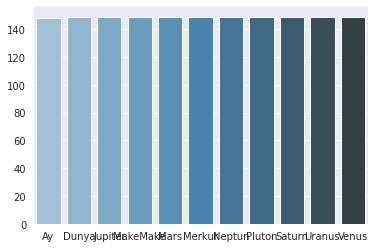

In [28]:
image_count = len(list(base_ds.glob('*/*.jpg')))
print(f'Toplam resimler: {image_count}')
print(f'Toplam sınıf: {len(gezegenler_classes)}')
count = 0
gezegenler_count = []
for x in gezegenler_classes:
  print(f'Toplam {x} resim: {len(gezegenler[count])}')
  gezegenler_count.append(len(gezegenler[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=gezegenler_classes, y=gezegenler_count, palette="Blues_d")
plt.show()

Image dimensions: (144, 256, 3)


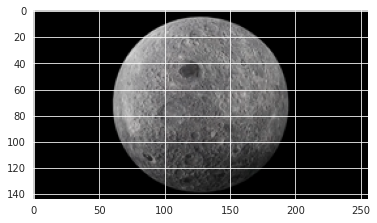

In [29]:
sample_img = cv2.imread('imgs/test/Ay/Moon (1).jpg')
plt.imshow(sample_img)
print(f'Image dimensions: {sample_img.shape}')

In [30]:
def load_random_img(dir, label):
  plt.figure(figsize=(20,20))
  i=0
  for label in gezegenler_classes:
    i+=1
    plt.subplot(1, 11, i)
    file = random.choice(os.listdir(f'{dir}/{label}'))
    image_path = os.path.join(f'{dir}/{label}', file)
    img=cv2.imread(image_path)
    plt.title(label)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')

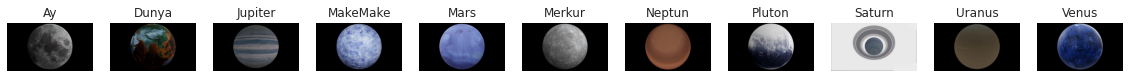

In [31]:
for i in range(1):
  load_random_img(base_ds, gezegenler_classes)

In [50]:
batch_size = 128
img_height, img_width = 175, 175
input_shape = (img_height, img_width, 3)

In [33]:
datagen = ImageDataGenerator(rescale=1./255)

In [34]:
train_ds = datagen.flow_from_directory(
    'imgs/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    subset = "training",
    class_mode='categorical')

val_ds = datagen.flow_from_directory(
    'imgs/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'imgs/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 1143 images belonging to 11 classes.
Found 242 images belonging to 11 classes.
Found 253 images belonging to 11 classes.


In [35]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [51]:
model_vanilla = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(11, activation='softmax')
])

In [52]:
model_vanilla.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vanilla.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 173, 173, 32)      896       
                                                                 
 batch_normalization_28 (Bat  (None, 173, 173, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 173, 173, 32)      9248      
                                                                 
 batch_normalization_29 (Bat  (None, 173, 173, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 87, 87, 32)       0         
 g2D)                                                            
                                                      

In [56]:
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

checkpointer = ModelCheckpoint(filepath='saved_models/model_vanilla.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[ reduce_lr, checkpointer]

In [57]:
history1 = model_vanilla.fit(train_ds, epochs = 40, validation_data = val_ds, callbacks=callbacks)

Epoch 1/40
36/36 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9825
Epoch 1: val_accuracy improved from -inf to 0.18182, saving model to saved_models/model_vanilla.hdf5
36/36 [==============================] - 7s 202ms/step - loss: 0.0524 - accuracy: 0.9825 - val_loss: 13.4863 - val_accuracy: 0.1818 - lr: 0.0010
Epoch 2/40
36/36 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9843
Epoch 2: val_accuracy improved from 0.18182 to 0.48760, saving model to saved_models/model_vanilla.hdf5
36/36 [==============================] - 6s 158ms/step - loss: 0.0430 - accuracy: 0.9843 - val_loss: 6.1285 - val_accuracy: 0.4876 - lr: 0.0010
Epoch 3/40
36/36 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9860
Epoch 3: val_accuracy did not improve from 0.48760
36/36 [==============================] - 5s 127ms/step - loss: 0.0385 - accuracy: 0.9860 - val_loss: 4.1763 - val_accuracy: 0.3678 - lr: 0.0010
Epoch 4/40
36/36 [===========

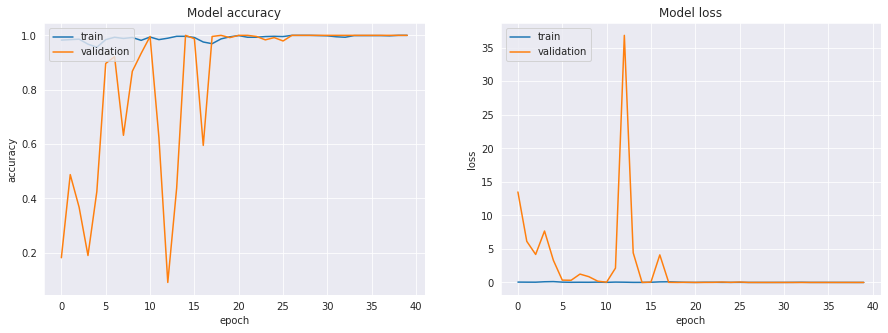

In [58]:
model_vanilla.load_weights('saved_models/model_vanilla.hdf5')
plot_train_history(history1)

In [59]:
score1 = model_vanilla.evaluate(test_ds, verbose=1)

8/8 [==============================] - 73s 10s/step - loss: 0.0065 - accuracy: 0.9960


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model_vanilla.predict(test_ds)

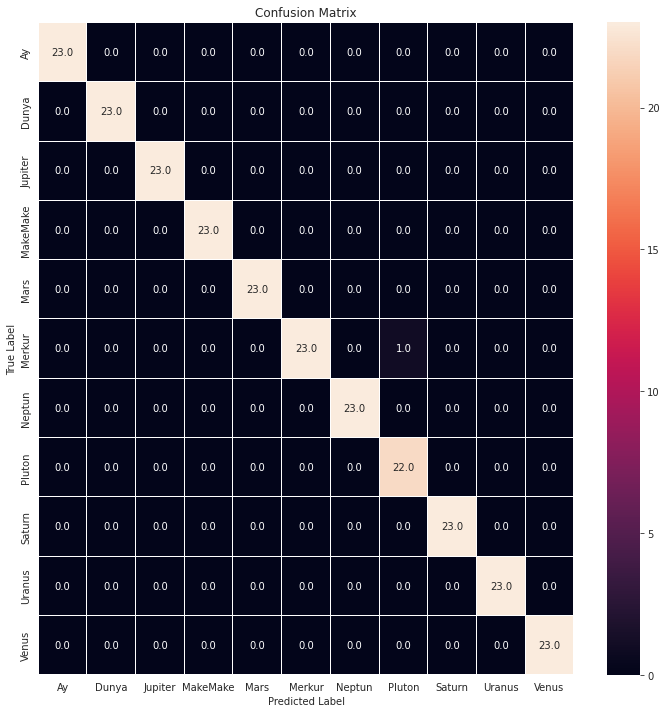

In [61]:
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, test_ds.classes)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_ds.class_indices)
ax.yaxis.set_ticklabels(gezegenler_classes)
plt.title("Confusion Matrix")
plt.show()

In [62]:
report1 = classification_report(test_ds.classes, y_pred, target_names=gezegenler_classes, output_dict=True)
df1 = pd.DataFrame(report1).transpose()
df1

,precision,recall,f1-score,support
Ay,1.000000,1.000000,1.000000,23.000000
Dunya,1.000000,1.000000,1.000000,23.000000
Jupiter,1.000000,1.000000,1.000000,23.000000
MakeMake,1.000000,1.000000,1.000000,23.000000
Mars,1.000000,1.000000,1.000000,23.000000
Merkur,0.958333,1.000000,0.978723,23.000000
Neptun,1.000000,1.000000,1.000000,23.000000
Pluton,1.000000,0.956522,0.977778,23.000000
Saturn,1.000000,1.000000,1.000000,23.000000
Uranus,1.000000,1.000000,1.000000,23.000000


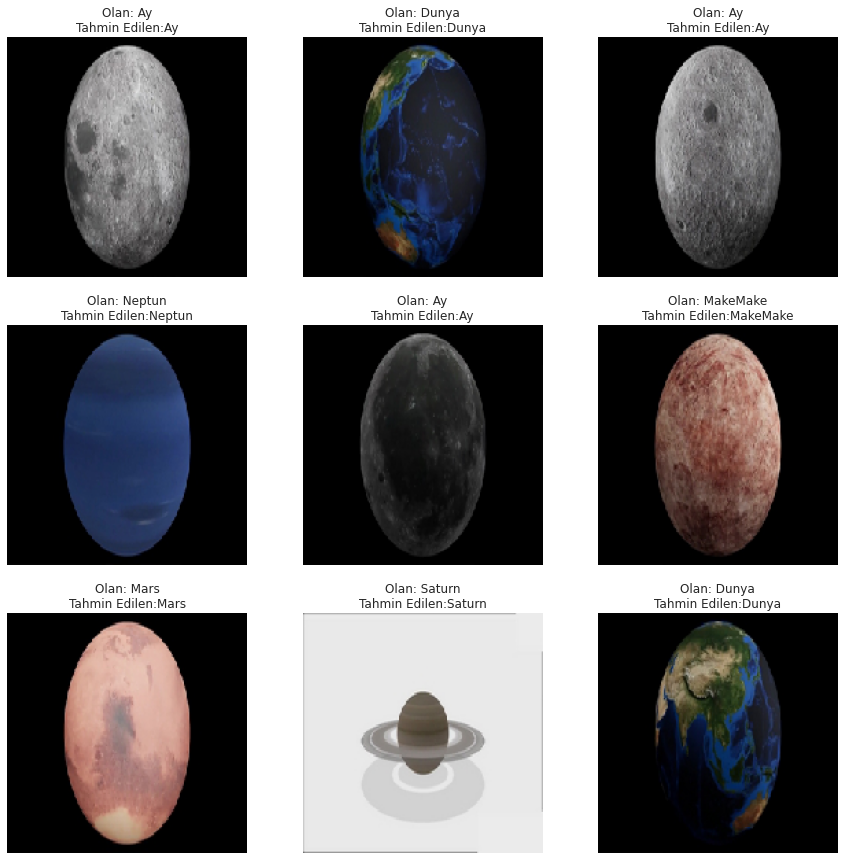

In [67]:
plt.figure(figsize=(15, 15))
x, label= train_ds.next()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i])
    result = np.where(label[i]==1)
    predict = model_vanilla(tf.expand_dims(x[i], 0))
    score = tf.nn.softmax(predict[0])
    score_label = gezegenler_classes[np.argmax(score)]
    plt.title(f'Olan: {gezegenler_classes[result[0][0]]}\nTahmin Edilen:{score_label}')
    plt.axis(False)